In [27]:
import sys
sys.path.append("/home/user/Projects/BOSK/")
from bosk.big_picture_utils import get_patches, combine_patches,segment_patch
from bosk.utils import load_model 
from bosk.imports import *

%load_ext autoreload
%autoreload 2

image_path = Path("../Some_images/Landscape_Bosk.png")
image = Image.open(image_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
splits_per_side = 16
num_patches = splits_per_side**2
patches = get_patches(image, num_patches)

fig, axes = plt.subplots(splits_per_side, splits_per_side)
for i in range(num_patches):
    row = i // splits_per_side
    col = i % splits_per_side

    axes[row, col].imshow(patches[i])

In [29]:
model_paths = [
    "../models/segformer_1.pth",
    "../models/unet_with_mobilenet_2.pth",
    "../models/newest_deeplab.pth",
]
model_types = ["segformer", "unet_mobile", "deeplab"]
assert (
    model_paths is not None and model_types is not None
), "Enter path for loading model and model's type"

In [ ]:
transform = T.Compose([
    T.Resize((512, 512)),
    T.ToTensor()
])

for model_path, model_type in zip(model_paths, model_types):
    print(f"{model_type} model is perfoming now")
    model = load_model(model_path, model_type)
    segmented_patches = {f"{model_type}": []}
    for patch in patches:
        patch = Image.fromarray(patch)
        segmented_patches[f"{model_type}"].append(segment_patch(model, patch, model_type, transform))

    result = combine_patches(segmented_patches[f"{model_type}"])
    result_path = Path(f"../Some_images/Segmented_images/{model_type}.png")
    plt.imsave(result_path, result)
    print(f"Result is saved in {result_path}\n")

segformer model is perfoming now


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([5]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([5, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Result is saved in ../Some_images/Segmented_images/segformer.png
unet_mobile model is perfoming now
Result is saved in ../Some_images/Segmented_images/unet_mobile.png
deeplab model is perfoming now
Result is saved in ../Some_images/Segmented_images/deeplab.png


# Тестирую новую версию

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


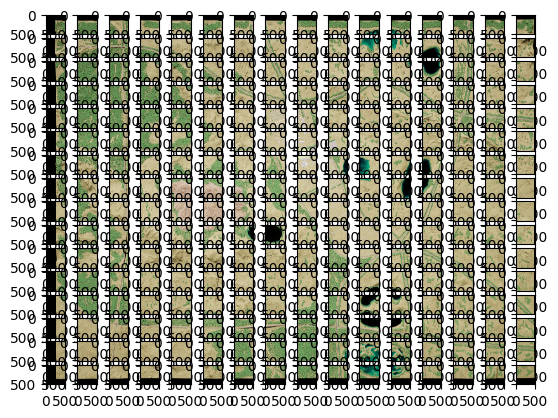

In [15]:
import sys
sys.path.append("/home/user/Projects/BOSK/")
from bosk.big_picture_utils import get_patches, get_patches_with_intersection, combine_patches, combine_patches_with_intersection, segment_patch
from bosk.utils import load_model 
from bosk.imports import *

%load_ext autoreload
%autoreload 2

image_path = Path("../Some_images/Landscape_Bosk.png")
image = Image.open(image_path)

splits_per_side = 16
patch_size = np.array(image).shape[0] // splits_per_side
num_patches = splits_per_side**2
patches = get_patches(image, num_patches)

fig, axes = plt.subplots(splits_per_side, splits_per_side)
for i in range(num_patches):
    row = i // splits_per_side
    col = i % splits_per_side
    axes[row, col].imshow(patches[i])


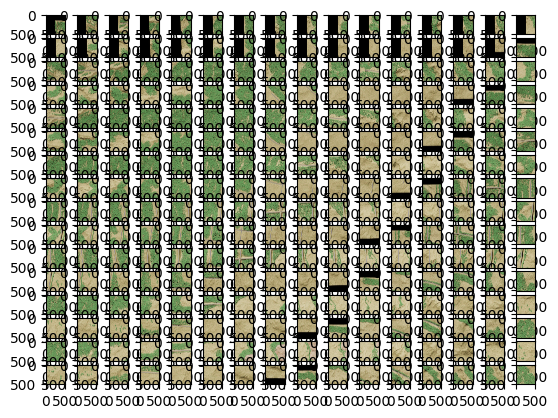

In [19]:
splits_per_side = 16
patch_size = np.array(image).shape[0] // splits_per_side
num_patches = splits_per_side**2
patches = get_patches_with_intersection(image, num_patches)
fig, axes = plt.subplots(splits_per_side, splits_per_side)
for i in range(num_patches):
    row = i // splits_per_side
    col = i % splits_per_side
    axes[row, col].imshow(patches[i])


# делаем небольшую проверку работы сегментации

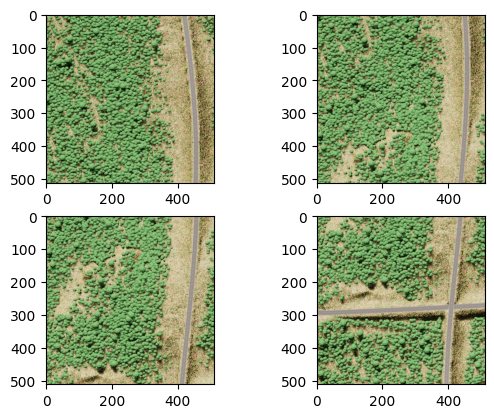

In [20]:
fig, axes = plt.subplots(2, 2)
for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].imshow(patches[132+i])

In [21]:
transform = T.Compose([
    T.Resize((patch_size, patch_size)),
    T.ToTensor()
])

model_path = Path("../models/newest_deeplab.pth")
model_type = "deeplab"
model = load_model(model_path, model_type)
segmented_patches = []
for i in range(4):
    patch = patches[132+i]
    patch = Image.fromarray(patch)
    segmented_patches.append(segment_patch(model, patch, model_type, transform))

result = combine_patches_with_intersection(segmented_patches)
result_path = Path(f"../Some_images/Segmented_images/{model_type}_test.png")
plt.imsave(result_path, result)

#  тестируем на всей картинке

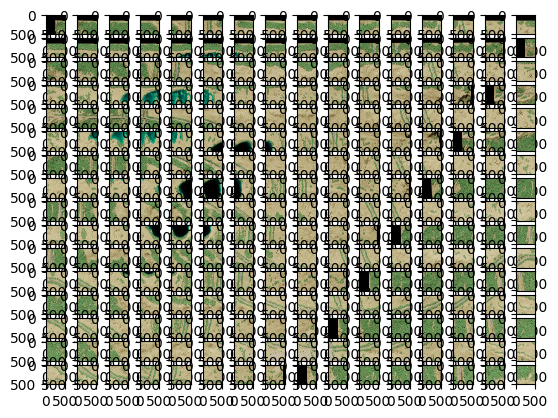

In [33]:
splits_per_side = 16
patch_size = np.array(image).shape[0] // splits_per_side
num_patches = splits_per_side**2
patches = get_patches_with_intersection(image, num_patches)
fig, axes = plt.subplots(splits_per_side, splits_per_side)
for i in range(num_patches):
    row = i // splits_per_side
    col = i % splits_per_side
    axes[row, col].imshow(patches[i])


In [46]:
model_paths = [
    # "../models/segformer_1.pth",
    # "../models/unet_with_mobilenet_2.pth",
    "../models/newest_deeplab.pth",
]
model_types = ["deeplab"]
assert (
    model_paths is not None and model_types is not None
), "Enter path for loading model and model's type"

In [47]:
transform = T.Compose([
    T.Resize((512, 512)),
    T.ToTensor()
])

for model_path, model_type in zip(model_paths, model_types):
    print(f"{model_type} model is perfoming now")
    model = load_model(model_path, model_type)
    segmented_patches = {f"{model_type}": []}
    for patch in patches:
        patch = Image.fromarray(patch)
        segmented_patches[f"{model_type}"].append(segment_patch(model, patch, model_type, transform))

    result = combine_patches_with_intersection(segmented_patches[f"{model_type}"])
    result_path = Path(f"../Some_images/Segmented_images/{model_type}_bigtest.png")
    plt.imsave(result_path, result)
    print(f"Result is saved in {result_path}\n")

deeplab model is perfoming now
Result is saved in ../Some_images/Segmented_images/deeplab_bigtest.png

